<a href="https://colab.research.google.com/github/chikum/SiK/blob/AES/AssignmentIMDBV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries/Dataset (0 mark)**

In [201]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
import io
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.layers import Dense
import tensorflow_hub as hub
import tensorflow.keras as keras 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

a. Import the required libraries and the dataset (use Google Drive if required).

b. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [203]:
path = "/content/drive/MyDrive/Data/IMDBDataset.csv"
data = pd.read_csv(path)

In [204]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [205]:
print(data.shape)

(50000, 2)


**2. Data Visualization (0.75 mark)**

 a. Print at least two movie reviews from each class of the dataset, for a sanity check that labels match the text.

In [206]:
df = data.to_numpy()
print(df.shape)

print('Sample 2 positive reviews : ')
print('=============================')
count=0
for i in range(1,50000):
  if count ==2:
    break

  if df[i][1]=='positive':    
    print(df[i][0])
    print(df[i][1])
    count=count+1

print('===============================================================')
print()

(50000, 2)
Sample 2 positive reviews : 
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating 

In [207]:
print('Sample 2 Negative reviews : ')
print('=============================')
count=0
for i in range(1,50000):
  if count ==2:
    break

  if df[i][1]=='negative':    
    print(df[i][0])
    print(df[i][1])
    count=count+1

print('===============================================================')
print()

Sample 2 Negative reviews : 
Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
negative
This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's

**b**. Plot a bar graph of class distribution in a dataset. Each bar depicts the number of tweets belonging to a particular sentiment. (recommended - matplotlib/seaborn libraries)

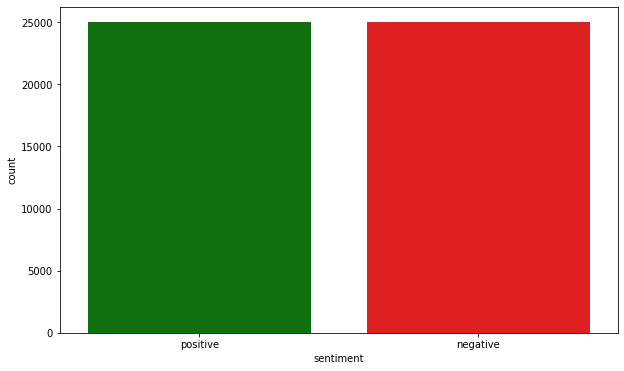

In [208]:
# print(data['sentiment'].value_counts())

fig = plt.figure(figsize = (10,6))
sns.countplot(data=data, x='sentiment', palette = ["green","red"])

In [209]:
data['sentiment'] = [1 if sentiment == 'positive' else 0 for sentiment in data['sentiment'].values]

In [210]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Train Test Split

In [211]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain ,Ytest = train_test_split(data['review'],data['sentiment'],test_size=0.33,random_state=0 )

## Shapes of train and test data.

In [212]:
print("Shapes To Train Data :")
print(Xtrain.shape)
print(Ytrain.shape)
print("Shapes To Test  Data :")
print(Xtest.shape)

print(Ytest.shape)

Shapes To Train Data :
(33500,)
(33500,)
Shapes To Test  Data :
(16500,)
(16500,)


In [213]:
# print a sample data

print('Xtrain \n', Xtrain[10])
print('Ytrain \n', Ytrain[10])

print('Xtest \n', Xtest[1])
print('Ytest \n', Ytest[1])

Xtrain 
 Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"
Ytrain 
 0
Xtest 
 A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the 

**3. Data Pre-processing (0.25 mark) **

**a.**Need for this Step - Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.


**b.** Please use this pre-trained embedding layer from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.


In [214]:
oXtrain = Xtrain
oXtest = Xtest

embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
#embeddings = embed(["cat is on the mat", "dog is in the fog"])
embeddingXtrain = embed(Xtrain)
embeddingXtest = embed(Xtest)

**c.** Bring the train and test data in the required format.

In [215]:
Xtrain = embeddingXtrain
Xtest = embeddingXtest



print(Xtrain.shape)
print(Ytrain.shape)

print(Xtest.shape)
print(Ytest.shape)
y_test = Ytest


(33500, 128)
(33500,)
(16500, 128)
(16500,)


In [216]:
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [217]:
print(Xtest.shape)
print(Ytest.shape)

print(Ytrain[:-10])
print(Ytest[:-10])

(16500, 128)
(16500, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [218]:
print(Xtrain.shape)
print(Ytrain.shape)

print(Xtest.shape)
print(Ytest.shape)

(33500, 128)
(33500, 2)
(16500, 128)
(16500, 2)


##4. Model Building 

##a.Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.



In [219]:
dnnModel = models.Sequential()

**Activation Function: Relu is most useful for hidden layer as this helps in training the hdden layer quickly .**
It does not activate all the neurons at the same time.
This means that the neurons will only be deactivated if the output of the linear transformation is less than 0.

We found that when we use Leaky Relu it helps in improving the Accuracy of the Training set as it does not make any negative neuron dead. it keep them small but alive.
Softwmax is used for the final Output layer as that selects that neuron whose weight means probablity is heighest amongst all.





In [220]:
# Layer 1 Hidden layer 
# adding Relu activation function as  # LeakyRelu
#dnnModel.add(layers.Dense(40, activation='relu', input_shape= (128,)))
dnnModel.add(layers.Dense(40, activation=keras.layers.LeakyReLU(alpha=0.03), input_shape= (128,)))

In [221]:
# Layer 2 = hidden layer  with Regularizers
#dnnModel.add(layers.Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)) )
dnnModel.add(layers.Dense(60, activation=keras.layers.LeakyReLU(alpha=0.02)))

##d. Choose the appropriate activation function for all the layers.

In [222]:
#Layer 3 Hidden Layer
dnnModel.add(layers.Dense(30, activation=keras.layers.LeakyReLU(alpha=0.01)))

##c. Add one layer of dropout at the appropriate position and give reasons.

**As this probem is Binary classification so Sigmoid Activation should be used as that give  output bw 0 and 1 .
It is useful in the binary classfication problem**

In [223]:
#Layer 4 Output Layer
#dnnModel.add(layers.Dense(2, activation='softmax'))
dnnModel.add(layers.Dense(2, activation='sigmoid'))

##e. Print the model summary.

In [224]:
dnnModel.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 40)                5160      
_________________________________________________________________
dense_93 (Dense)             (None, 60)                2460      
_________________________________________________________________
dense_94 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_95 (Dense)             (None, 2)                 62        
Total params: 9,512
Trainable params: 9,512
Non-trainable params: 0
_________________________________________________________________


**Optimization function**: Gradient Descent has disadvantage that it can stuck in Local Minima. 
Other Optimization functions learning rate is constant for all parameters and for each cycle. We found when we use **Adagrad** which changes the learning rate automatically internally for each cycle for optimum result gives better results in the accuracy and finding the better results.
**Adagrad tends to benefit from higher initial learning rate values compared to other optimizers. To match the exact form in the original paper, use 1.0.**


In [225]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

opt = keras.optimizers.Adam(learning_rate=0.06)

rms = tf.keras.optimizers.RMSprop(
    learning_rate=0.06,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
# Adagrad tends to benefit from higher initial learning rate values compared to other optimizers. To match the exact form in the original paper, use 1.0.
adg = tf.keras.optimizers.Adagrad(
    learning_rate=1.0,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad", 
)

dnnModel.compile( optimizer = adg, loss = 'binary_crossentropy', metrics=['accuracy'] )
#dnnModel.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'] )
print(Xtrain.shape)
print(Ytrain.shape)

print(Xtrain[0])
print(Ytrain[0])



(33500, 128)
(33500, 2)
tf.Tensor(
[ 1.47242510e+00 -1.60027221e-01  1.47459224e-01  4.85372335e-01
  9.34651494e-02 -2.93215156e-01  4.27043065e-02 -3.20206851e-01
 -2.11031377e-01 -5.66693693e-02  5.47432639e-02 -6.85985982e-01
 -2.83679128e-01 -5.21231234e-01 -1.89524174e-01 -3.57939526e-02
 -1.63974568e-01  1.46641387e-02 -1.72429025e-01  9.96929944e-01
  1.14356034e-01  1.68717623e-01 -3.91296782e-02  1.86212704e-01
 -1.25741526e-01 -3.25104058e-01 -4.42002788e-02  1.25886230e-02
 -2.18402594e-02 -4.23970446e-02  1.60016567e-01  1.72809049e-01
  3.28686357e-01 -5.12002893e-02  3.03797364e-01 -5.04753031e-02
 -3.31442505e-01 -4.63478148e-01 -1.65949285e-01  4.00649399e-01
 -1.10821307e-01  5.88939004e-02 -1.34986505e-01 -1.15372628e-01
  2.43344948e-01  9.67528373e-02  8.97682384e-02 -3.76606554e-01
 -3.37005824e-01  9.92517918e-02 -3.45435031e-02  2.25428164e-01
 -1.27526522e-01  2.87392765e-01 -1.74793005e-01 -3.16415668e-01
 -1.43903434e-01 -7.64355063e-02  2.84669966e-01  6.620

In [226]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [227]:
start = time.time()
h  = dnnModel.fit( Xtrain, Ytrain,validation_split=0.2, epochs=25, batch_size=64)
print("Total time: ", time.time() - start, "seconds")
# fit model
#hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.2, epochs=25, verbose=0, callbacks=[es])

Epoch 1/25
419/419 [==============================] - 2s 3ms/step - loss: 0.6980 - accuracy: 0.5176 - val_loss: 0.6952 - val_accuracy: 0.4999
Epoch 2/25
419/419 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6836 - val_accuracy: 0.5660
Epoch 3/25
419/419 [==============================] - 1s 2ms/step - loss: 0.6598 - accuracy: 0.6069 - val_loss: 0.4856 - val_accuracy: 0.7879
Epoch 4/25
419/419 [==============================] - 1s 2ms/step - loss: 0.4978 - accuracy: 0.7622 - val_loss: 0.4504 - val_accuracy: 0.7875
Epoch 5/25
419/419 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7827 - val_loss: 0.4421 - val_accuracy: 0.7904
Epoch 6/25
419/419 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.7910 - val_loss: 0.4415 - val_accuracy: 0.7896
Epoch 7/25
419/419 [==============================] - 1s 3ms/step - loss: 0.4539 - accuracy: 0.7900 - val_loss: 0.4433 - val_accuracy: 0.7928
Epoch 

##Total Time In Training 

In [228]:
print("Total time: ", time.time() - start, "seconds")

Total time:  26.335622549057007 seconds


In [229]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.4211912155151367
Final training accuracy  0.8038805723190308


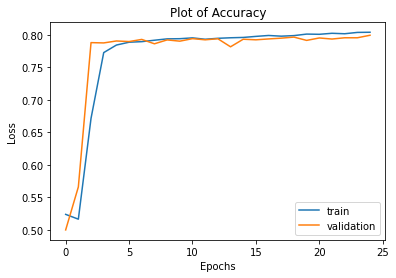

In [230]:
# plot the training  accuracy  
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

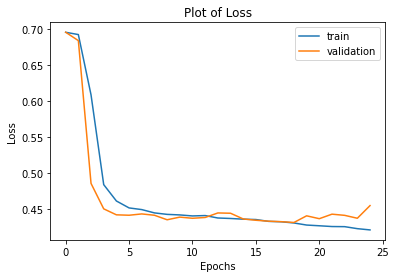

In [231]:
# plot the traininig loss 


plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

In [232]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

516/516 [==============================] - 1s 2ms/step - loss: 0.4622 - accuracy: 0.7940
Testing loss 	 0.4621540606021881
Testing accuracy  0.7940000295639038


In [233]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#Ypred
yhat_probs  = dnnModel.predict(Xtest,verbose=1)
yhat_classes  = dnnModel.predict_classes(Xtest,verbose=1)
from sklearn.datasets import make_circles

158/516 [========>.....................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


516/516 [==============================] - 1s 959us/step


In [234]:
# reduce to 1d array
print(yhat_probs.shape)
print(yhat_probs[:5])
print(yhat_classes.shape)
print(yhat_classes[:5])
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

(16500, 2)
[[0.5656362  0.4341456 ]
 [0.88845086 0.11144111]
 [0.14200711 0.8580116 ]
 [0.28227288 0.717427  ]
 [0.20949213 0.79049426]]
(16500,)
[0 0 1 1 1]


In [235]:
print(Ytest.shape)
#print(Ytest[16499])

print(y_test.shape)
#print(y_test[:10])


(16500, 2)
(16500,)


#Metrics : Accuracy, F1 Score

In [236]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)



Accuracy: 0.794000
Precision: 0.771396
Recall: 0.833435
F1 score: 0.801216


##Confusion Matrix:
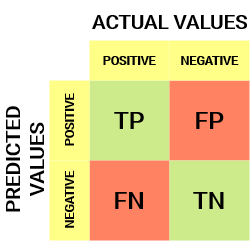

In [237]:
print(y_test.shape)
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(y_test, yhat_probs)
#print('ROC AUC: %f' % auc)
# confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

(16500,)
Cohens kappa: 0.588118
Confusion Matrix
[[6251 2030]
 [1369 6850]]


#Classifier Analysis :
We can see that Precision value is 80% means Out of all Positive cases reported 80% are TP .

Recall : 79% means out of all Positive reviewes we are able to Detect 79% cases.

For Movie recommender system Presision is more important as if User will get Bad movie review as positive then again he will not use our Recommender system.
So we can say that Our Classification Model is good classifier for th eall Positive review.


In [238]:
print(Xtest.shape)
print(y_test.shape)
print(yhat_probs.shape)

(16500, 128)
(16500,)
(16500, 2)


In [239]:
#svm.predict([item])
y_test1 = y_test.to_numpy()
#yhat_probs = yhat_probs.to_numpy()
count =0
for item in range(0,16499):
    if count >=2:
      break

    if y_test1[item] != yhat_probs[item][1]:
      print("Misclassified Review are : ===========")      
      print(oXtest.to_numpy()[item])
      count = count + 1
    

Misclassified Review are : ===========
John Cassavetes is on the run from the law. He is at the bottom of the heap. He sees Negro Sidney Poitier as his equal and they quickly become friends, forming a sort of alliance against a bully of a foreman played by Jack Warden.<br /><br />As someone who has worked in a warehouse myself when I was younger, I can tell you that the warehouse fights, complete with tumbling packing cases and flailing grappling hooks are as realistic as it gets. I've been in fights like these myself, although no one got killed.<br /><br />The introduction of Sidney Poitier's widow is a variation on Shakespeare's Shylock "Do I not bleed?" This is an anti racist film, which, at the time, was much needed.<br /><br />All the three principle characters - Warden, Cassavetes and Poitier - are superb, with Warden the most outstanding of the three.
Misclassified Review are : ===========
It's not just that the movie is lame. It's more than that. This movie is just unnecessary.

##As per the above graph we can see that Accuracy is very good for training Data but for validation data it is not good. Our Model is overfitting. For that We will apply the L2 and L1 Regularization techniques ##



##L2 Regularisation 

In [240]:
dnnModel = models.Sequential()
# Layer 1 Hidden layer 
dnnModel.add(layers.Dense(40, activation=keras.layers.LeakyReLU(alpha=0.05), input_shape= (128,)))
#Layer 2 Hidden Layer
dnnModel.add(layers.Dense(60, activation=keras.layers.LeakyReLU(alpha=0.03), kernel_regularizer=regularizers.l2(0.020), activity_regularizer=regularizers.l2(0.02)) )

#Layer 3 Hidden Layer
dnnModel.add(layers.Dense(30, activation=keras.layers.LeakyReLU(alpha=0.02), kernel_regularizer=regularizers.l2(0.020), activity_regularizer=regularizers.l2(0.02))) 

#Layer 4 Hidden Layer
# Add dropout of 20% to layer 4 as we can see that there ios overfitting in the above training accuracy to test accuracy
dnnModel.add(layers.Dropout(0.2))

dnnModel.add(layers.Dense(2, activation='sigmoid'))
#dnnModel.add(layers.Dense(2, activation='softmax'))
dnnModel.summary()

# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error

opt = keras.optimizers.Adam(learning_rate=0.06)

rms = tf.keras.optimizers.RMSprop(
    learning_rate=0.09,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

adg = tf.keras.optimizers.Adagrad(
    learning_rate=1.0,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad", 
)

dnnModel.compile( optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'] )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
start = time.time()

hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.2, epochs=25, verbose=1, callbacks=[es])
print("Total time: ", time.time() - start, "seconds")



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 40)                5160      
_________________________________________________________________
dense_97 (Dense)             (None, 60)                2460      
_________________________________________________________________
dense_98 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_24 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_99 (Dense)             (None, 2)                 62        
Total params: 9,512
Trainable params: 9,512
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
838/838 [==============================] - 3s 3ms/step - loss: 0.7400 - accuracy: 0.4966 - val_loss: 0.693

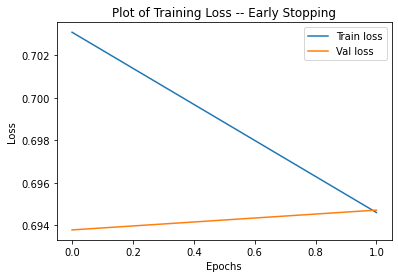

In [241]:
# plot the training loss

plt.plot(hes.history['loss'], label='Train loss')
plt.plot(hes.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss -- Early Stopping')
plt.legend()
plt.show()

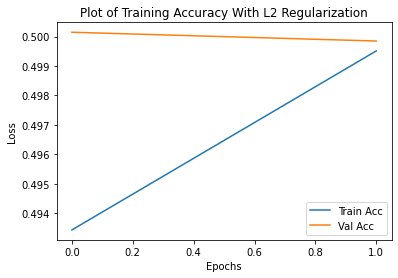

In [242]:
# plot the training accuracy

plt.plot(hes.history['accuracy'], label='Train Acc')
plt.plot(hes.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy With L2 Regularization')
plt.legend()
plt.show()

In [243]:
# testing the model
testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)


516/516 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4981


In [244]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.6948473453521729
Testing accuracy  0.4981212019920349


Testing the Model

## L1 Regularization 

In [245]:
dnnModel = models.Sequential()
# Layer 1 Hidden layer 
dnnModel.add(layers.Dense(40, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape= (128,)))
#Layer 2 Hidden Layer
dnnModel.add(layers.Dense(60, activation=keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l1(0.10), activity_regularizer=regularizers.l1(0.05)) )

#Layer 3 Hidden Layer
dnnModel.add(layers.Dense(30, activation=keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l1(0.10), activity_regularizer=regularizers.l1(0.05)) )
#Layer 4 Hidden Layer

# Add dropout of 20% to layer 4 as we can see that there ios overfitting in the above training accuracy to test accuracy
dnnModel.add(layers.Dropout(0.2))


#Layer 4 Hidden Layer
#dnnModel.add(layers.Dense(2, activation='softmax'))
dnnModel.add(layers.Dense(2, activation='sigmoid'))
dnnModel.summary()

# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error

opt = keras.optimizers.Adam(learning_rate=0.06)

rms = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

adg = tf.keras.optimizers.Adagrad(
    learning_rate=1.0,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad", 
)

dnnModel.compile( optimizer = adg, loss = 'binary_crossentropy', metrics=['accuracy'] )
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
start = time.time()
hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.2, epochs=25, verbose=1, callbacks=[es])
print("Total time: ", time.time() - start, "seconds")

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 40)                5160      
_________________________________________________________________
dense_101 (Dense)            (None, 60)                2460      
_________________________________________________________________
dense_102 (Dense)            (None, 30)                1830      
_________________________________________________________________
dropout_25 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 2)                 62        
Total params: 9,512
Trainable params: 9,512
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25


838/838 [==============================] - 3s 3ms/step - loss: 21.4932 - accuracy: 0.4954 - val_loss: 6.5331 - val_accuracy: 0.4999
Epoch 2/25
838/838 [==============================] - 2s 3ms/step - loss: 7.2151 - accuracy: 0.5007 - val_loss: 4.8836 - val_accuracy: 0.5001
Epoch 3/25
838/838 [==============================] - 2s 3ms/step - loss: 5.5314 - accuracy: 0.4968 - val_loss: 4.1867 - val_accuracy: 0.4999
Epoch 4/25
838/838 [==============================] - 2s 3ms/step - loss: 4.7151 - accuracy: 0.5086 - val_loss: 3.7713 - val_accuracy: 0.4999
Epoch 5/25
838/838 [==============================] - 3s 3ms/step - loss: 4.2100 - accuracy: 0.4997 - val_loss: 3.5845 - val_accuracy: 0.4999
Epoch 6/25
838/838 [==============================] - 2s 3ms/step - loss: 3.8581 - accuracy: 0.4980 - val_loss: 3.4113 - val_accuracy: 0.4999
Epoch 7/25
838/838 [==============================] - 2s 3ms/step - loss: 3.5944 - accuracy: 0.4984 - val_loss: 3.2472 - val_accuracy: 0.4999
Epoch 8/25
838/8

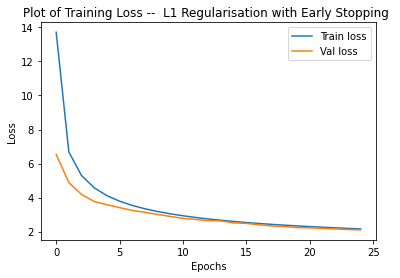

In [246]:
# plot the training loss

plt.plot(hes.history['loss'], label='Train loss')
plt.plot(hes.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss --  L1 Regularisation with Early Stopping ')
plt.legend()
plt.show()

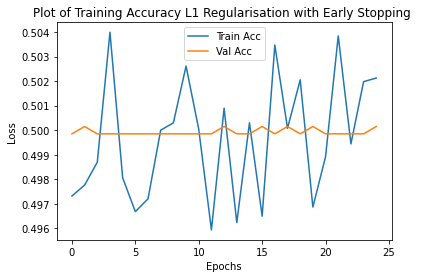

In [247]:
# plot the training accuracy

plt.plot(hes.history['accuracy'], label='Train Acc')
plt.plot(hes.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy L1 Regularisation with Early Stopping ')
plt.legend()
plt.show()

In [248]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

516/516 [==============================] - 1s 2ms/step - loss: 2.1016 - accuracy: 0.5019
Testing loss 	 2.1015734672546387
Testing accuracy  0.5018787980079651


In [249]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 2.1015734672546387
Testing accuracy  0.5018787980079651


##Here we can see that L2 Regularisation gives better results it is because 
##L1’s effect on pushing towards 0 (sparsity) or we can say that reducing the number of features

#Hyperparameter Tuning-
1. Dropout: Change the position and value of dropout layer
2. Batch Size: Change the value of batch size in model training

## New Model-1 with changes in Dropouts and Batch Size 

In [250]:
print(Xtrain.shape)
print(Ytrain.shape)

(33500, 128)
(33500, 2)


In [251]:
dnnModel = models.Sequential()
# Layer 1 Hidden layer 
dnnModel.add(layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape= (128,)))
#Layer 2 Hidden Layer
dnnModel.add(layers.Dense(120, activation=keras.layers.LeakyReLU(alpha=0.01)) )

#Layer 3 Hidden Layer
#dnnModel.add(layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.02), kernel_regularizer=regularizers.l2(0.060))) 
dnnModel.add(layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.5))) 

#Layer 4 Hidden Layer
dnnModel.add(layers.Dense(80, activation=keras.layers.LeakyReLU(alpha=0.03))) 


#Layer 4 Hidden Layer
# Add dropout of 20% to layer 4 as we can see that there ios overfitting in the above training accuracy to test accuracy
dnnModel.add(layers.Dropout(0.5))
#Layer 4 Hidden Layer
dnnModel.add(layers.Dense(40, activation=keras.layers.LeakyReLU(alpha=0.02), kernel_regularizer=regularizers.l2(0.020))) 

dnnModel.add(layers.Dense(2, activation='sigmoid'))
#dnnModel.add(layers.Dense(2, activation='softmax'))
dnnModel.summary()

# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error

opt = keras.optimizers.Adam(learning_rate=0.09)

rms = tf.keras.optimizers.RMSprop(
    learning_rate=0.09,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

adg = tf.keras.optimizers.Adagrad(
    learning_rate=.5,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad", 
)

dnnModel.compile( optimizer = adg, loss = 'binary_crossentropy', metrics=['accuracy'] )

#es = EarlyStopping(monitor='val_loss',min_delta=0, mode='min', verbose=1)

#hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.3, epochs=64, verbose=1, callbacks=[es])
hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.3, epochs=32, verbose=1)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_105 (Dense)            (None, 120)               12120     
_________________________________________________________________
dense_106 (Dense)            (None, 100)               12100     
_________________________________________________________________
dense_107 (Dense)            (None, 80)                8080      
_________________________________________________________________
dropout_26 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_108 (Dense)            (None, 40)                3240      
_________________________________________________________________
dense_109 (Dense)            (None, 2)               

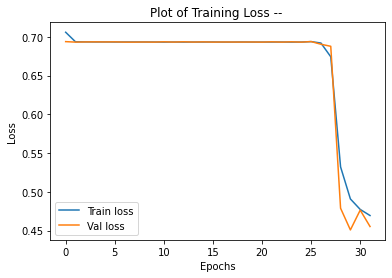

In [252]:
# plot the training loss

plt.plot(hes.history['loss'], label='Train loss')
plt.plot(hes.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss -- ')
plt.legend()
plt.show()

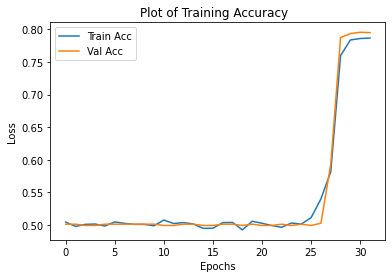

In [253]:
# plot the training accuracy

plt.plot(hes.history['accuracy'], label='Train Acc')
plt.plot(hes.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy  ')
plt.legend()
plt.show()

In [254]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

516/516 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7968
Testing loss 	 0.4574764668941498
Testing accuracy  0.7967878580093384
Testing loss 	 0.4574764668941498
Testing accuracy  0.7967878580093384


## New Model-2 with changes in Dropouts and Batch Size 

In [255]:
dnnModel = models.Sequential()
# Layer 1 Hidden layer 
dnnModel.add(layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape= (128,)))
#Layer 2 Hidden Layer
dnnModel.add(layers.Dense(120, activation=keras.layers.LeakyReLU(alpha=0.01)) )

dnnModel.add(layers.Dropout(0.5))

#Layer 3 Hidden Layer
#dnnModel.add(layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.02), kernel_regularizer=regularizers.l2(0.060))) 
dnnModel.add(layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.5))) 

#Layer 4 Hidden Layer
dnnModel.add(layers.Dense(80, activation=keras.layers.LeakyReLU(alpha=0.03))) 


#Layer 4 Hidden Layer
# Add dropout of 20% to layer 4 as we can see that there ios overfitting in the above training accuracy to test accuracy
dnnModel.add(layers.Dropout(0.5))
#Layer 4 Hidden Layer
dnnModel.add(layers.Dense(40, activation=keras.layers.LeakyReLU(alpha=0.02), kernel_regularizer=regularizers.l2(0.020))) 

dnnModel.add(layers.Dense(2, activation='sigmoid'))
#dnnModel.add(layers.Dense(2, activation='softmax'))
dnnModel.summary()

# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error

opt = keras.optimizers.Adam(learning_rate=0.09)

rms = tf.keras.optimizers.RMSprop(
    learning_rate=0.09,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

adg = tf.keras.optimizers.Adagrad(
    learning_rate=.5,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad", 
)

dnnModel.compile( optimizer = adg, loss = 'binary_crossentropy', metrics=['accuracy'] )

#es = EarlyStopping(monitor='val_loss',min_delta=0, mode='min', verbose=1)

#hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.3, epochs=64, verbose=1, callbacks=[es])
hes = dnnModel.fit(Xtrain, Ytrain, validation_split=0.3, epochs=32, verbose=1)


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_111 (Dense)            (None, 120)               12120     
_________________________________________________________________
dropout_27 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 100)               12100     
_________________________________________________________________
dense_113 (Dense)            (None, 80)                8080      
_________________________________________________________________
dropout_28 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_114 (Dense)            (None, 40)              

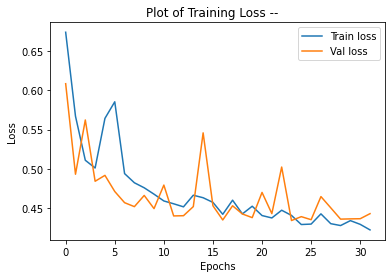

In [256]:
# plot the training loss

plt.plot(hes.history['loss'], label='Train loss')
plt.plot(hes.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss --   ')
plt.legend()
plt.show()

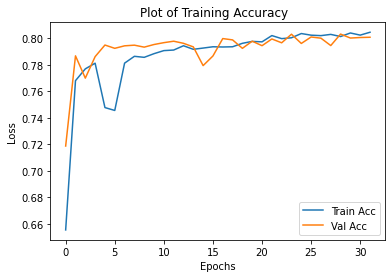

In [257]:
# plot the training accuracy

plt.plot(hes.history['accuracy'], label='Train Acc')
plt.plot(hes.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy  ')
plt.legend()
plt.show()

In [258]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

516/516 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.7941
Testing loss 	 0.4401419460773468
Testing accuracy  0.7941212058067322
Testing loss 	 0.4401419460773468
Testing accuracy  0.7941212058067322
